<a href="https://colab.research.google.com/github/anushikha165/anushikha-firstrepo/blob/main/Anushikha_240159_Grid_Intelli_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
print("Top 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())


Top 5 rows:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compa

In [ ]:
print(df.dtypes)


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [ ]:
columns_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style",
                   "Popularity", "Number of Doors", "Vehicle Size"]
df = df.drop(columns=columns_to_drop)
print("Top 5 rows after dropping irrelevant columns:")
print(df.head())


Top 5 rows after dropping irrelevant columns:
  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


In [ ]:
columns_to_rename = {
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
}
df = df.rename(columns=columns_to_rename)
print("Top 5 rows after renaming columns:")
print(df.head())

Top 5 rows after renaming columns:
  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


In [ ]:
original_shape = df.shape
print(f"Original shape of the dataset: {original_shape}")
duplicated_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicated_rows}")
df = df.drop_duplicates()
new_shape = df.shape
print(f"New shape of the dataset after dropping duplicates: {new_shape}")


Original shape of the dataset: (11914, 10)
Number of duplicate rows: 989
New shape of the dataset after dropping duplicates: (10925, 10)


In [ ]:
print("Sum of numerical columns:")
print(df.sum(numeric_only=True))
print("\nMean of numerical columns:")
print(df.mean(numeric_only=True))
print("\nStandard deviation of numerical columns:")
print(df.std(numeric_only=True))
print("\nMinimum of numerical columns:")
print(df.min(numeric_only=True))
print("\n25th percentile of numerical columns:")
print(df.quantile(0.25, numeric_only=True))
print("\nMedian (50th percentile) of numerical columns:")
print(df.median(numeric_only=True))
print("\n75th percentile of numerical columns:")
print(df.quantile(0.75, numeric_only=True))
print("\nMaximum of numerical columns:")
print(df.max(numeric_only=True))


Sum of numerical columns:
Year          21969278.0
HP             2761761.0
Cylinders        61755.0
MPG-H           291203.0
MPG-C           215996.0
Price        464275308.0
dtype: float64

Mean of numerical columns:
Year          2010.917895
HP             254.399503
Cylinders        5.668196
MPG-H           26.654737
MPG-C           19.770801
Price        42496.595698
dtype: float64

Standard deviation of numerical columns:
Year             7.016102
HP             109.771351
Cylinders        1.799464
MPG-H            9.031109
MPG-C            9.259532
Price        62053.533610
dtype: float64

Minimum of numerical columns:
Year         1990.0
HP             55.0
Cylinders       0.0
MPG-H          12.0
MPG-C           7.0
Price        2000.0
dtype: float64

25th percentile of numerical columns:
Year          2007.0
HP             173.0
Cylinders        4.0
MPG-H           22.0
MPG-C           16.0
Price        21995.0
Name: 0.25, dtype: float64

Median (50th percentile) of numerical 

In [ ]:
print("Sum of missing values before cleaning:")
print(df.isnull().sum())
df_cleaned = df.dropna()
print("\nSum of missing values after cleaning:")
print(df_cleaned.isnull().sum())


Sum of missing values before cleaning:
Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

Sum of missing values after cleaning:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


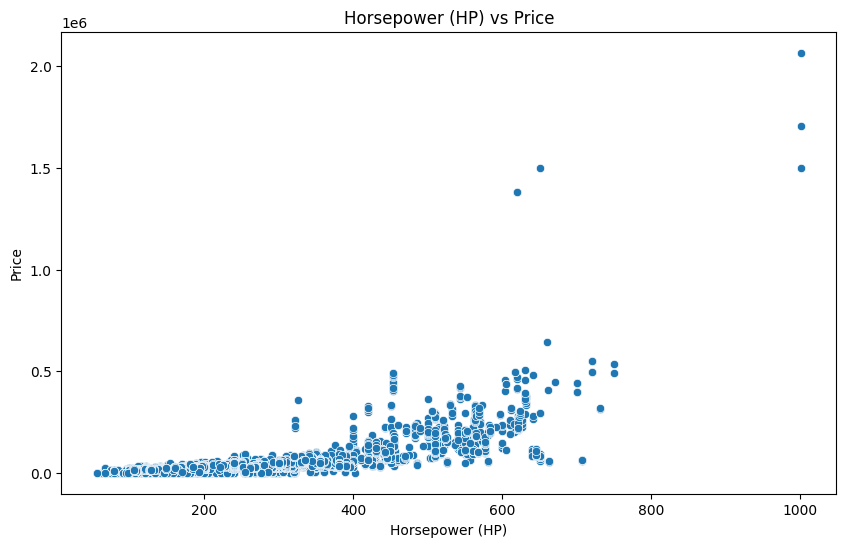

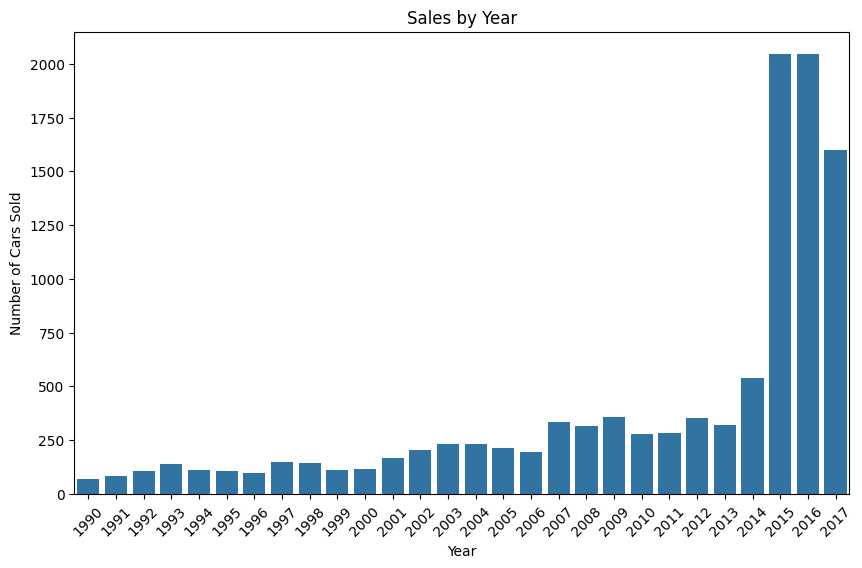

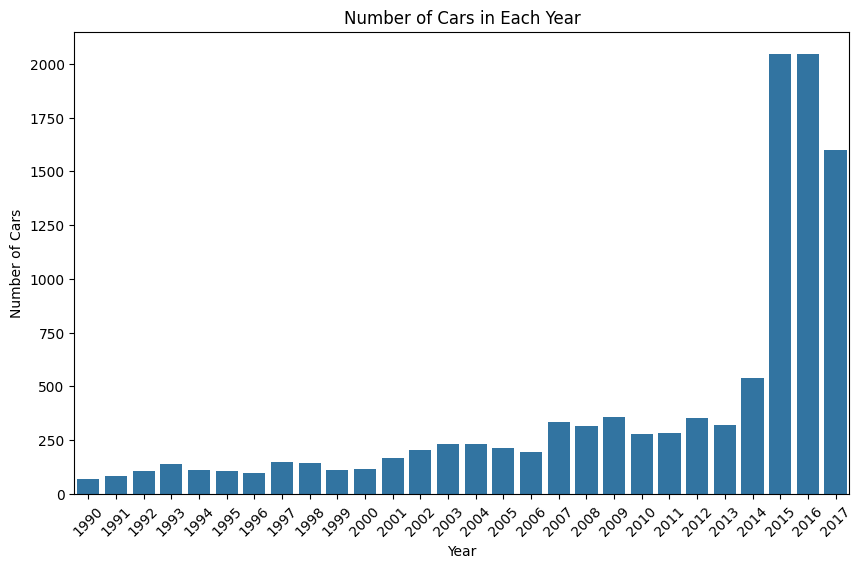

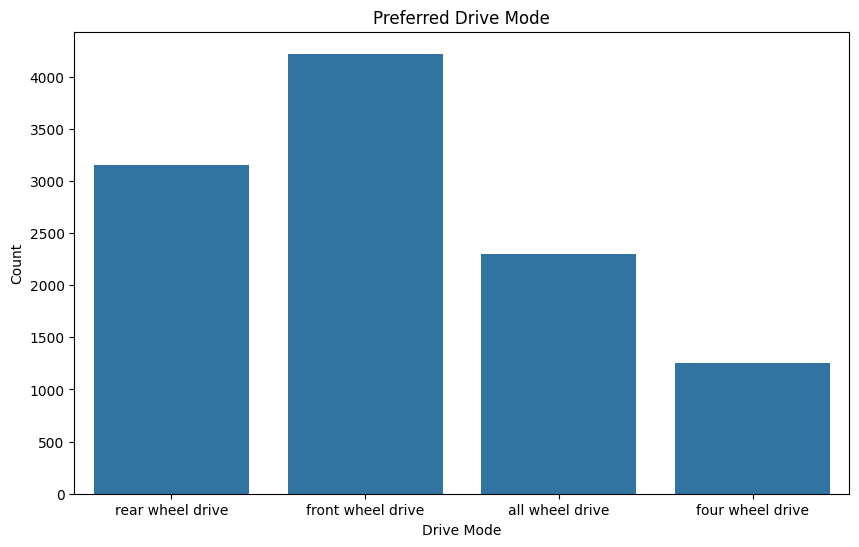

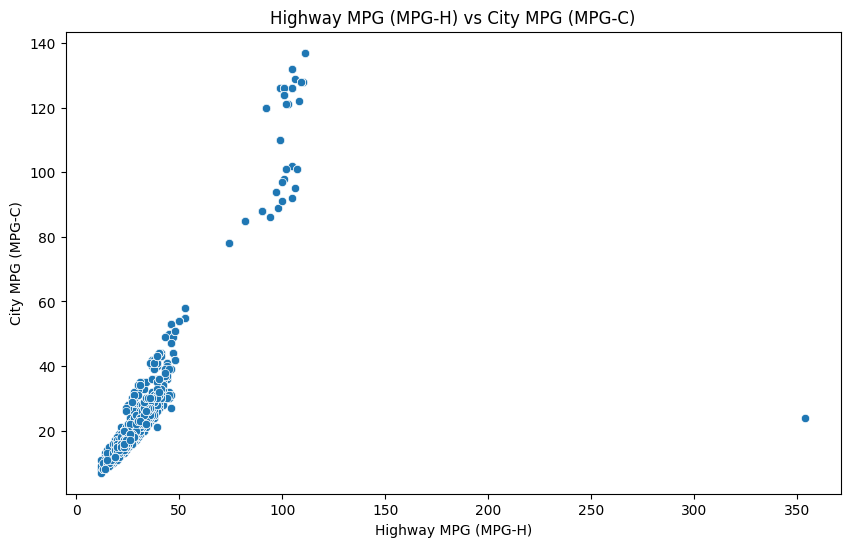

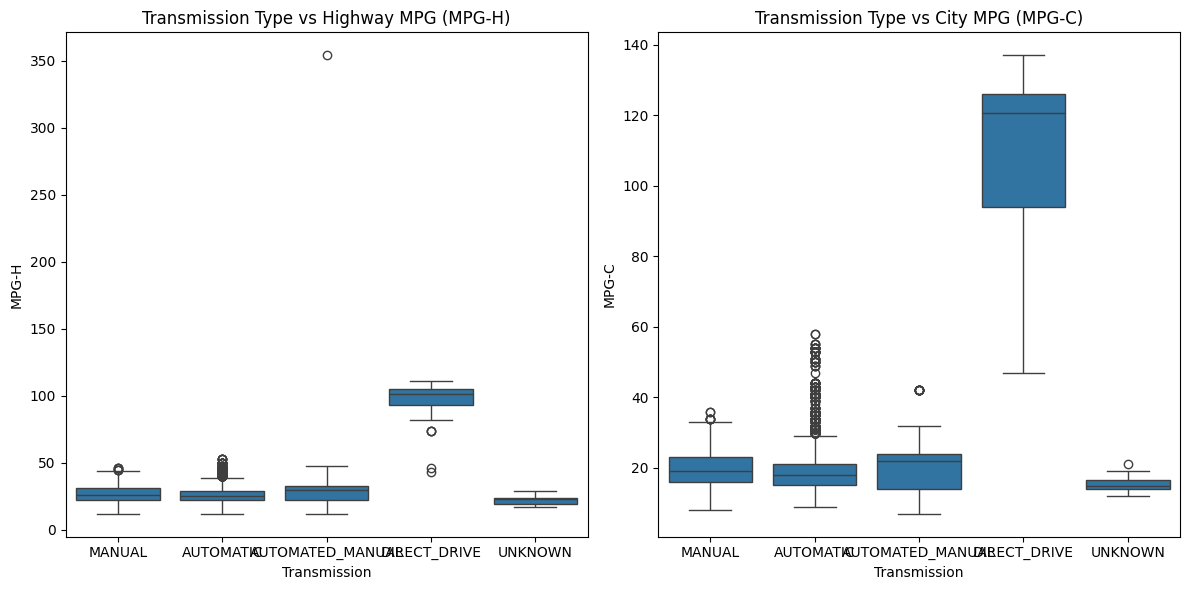

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HP', y='Price', data=df)
plt.title('Horsepower (HP) vs Price')
plt.xlabel('Horsepower (HP)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Cars in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Drive Mode', data=df)
plt.title('Preferred Drive Mode')
plt.xlabel('Drive Mode')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MPG-H', y='MPG-C', data=df)
plt.title('Highway MPG (MPG-H) vs City MPG (MPG-C)')
plt.xlabel('Highway MPG (MPG-H)')
plt.ylabel('City MPG (MPG-C)')
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Transmission', y='MPG-H', data=df)
plt.title('Transmission Type vs Highway MPG (MPG-H)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='MPG-C', data=df)
plt.title('Transmission Type vs City MPG (MPG-C)')

plt.tight_layout()
plt.show()


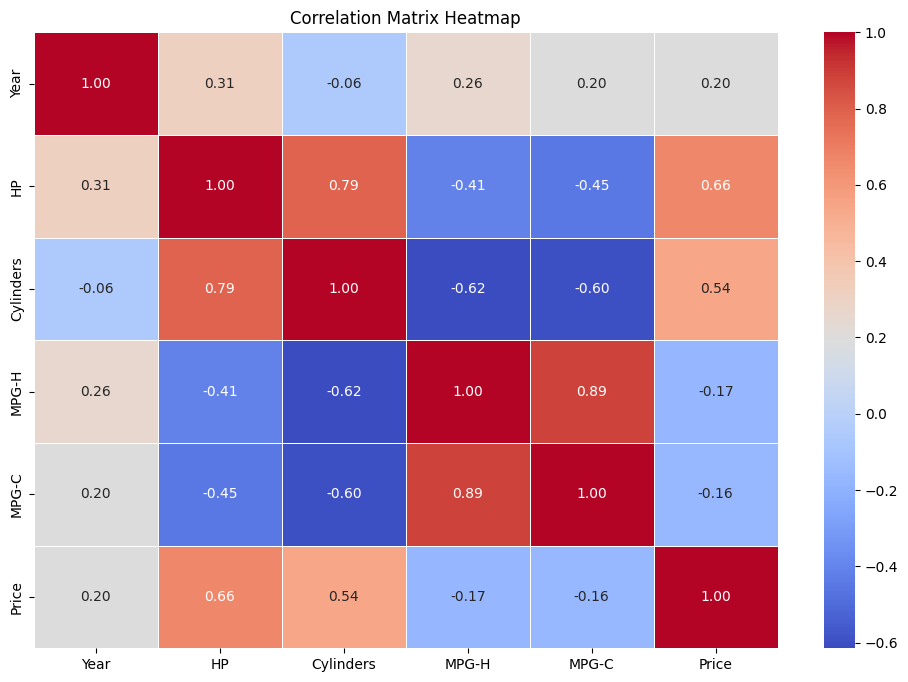

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
